In [2]:
#import libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
df=pd.read_csv('data.csv')

In [4]:
df.shape

(1852394, 6)

In [5]:
df.tail(20)

,Unnamed: 0,category,amt,gender,city_pop,is_fraud
1852374,1296655,food_dining,78.40,F,263,0
1852375,1296656,misc_pos,5.48,M,687276,0
1852376,1296657,misc_net,264.22,F,217,0
1852377,1296658,food_dining,12.66,M,128715,0
1852378,1296659,shopping_pos,9.72,F,1523,0
1852379,1296660,kids_pets,49.93,M,229,0
1852380,1296661,home,77.83,M,1770,0
1852381,1296662,personal_care,157.69,F,4575,0
1852382,1296663,home,84.10,F,6703,0
1852383,1296664,entertainment,69.38,F,5895,0


In [6]:
df['category'].value_counts()

category
gas_transport     188029
grocery_pos       176191
home              175460
shopping_pos      166463
kids_pets         161727
shopping_net      139322
entertainment     134118
food_dining       130729
personal_care     130085
health_fitness    122553
misc_pos          114229
misc_net           90654
grocery_net        64878
travel             57956
Name: count, dtype: int64

In [7]:
#leaveoneout to encode
from category_encoders import LeaveOneOutEncoder
encoder = LeaveOneOutEncoder(cols=['category'])
df['category_encoded'] = encoder.fit_transform(df['category'], df['is_fraud'])

In [8]:
#drop the original column
df.drop('category', axis=1, inplace=True)

In [9]:
df.shape

(1852394, 6)

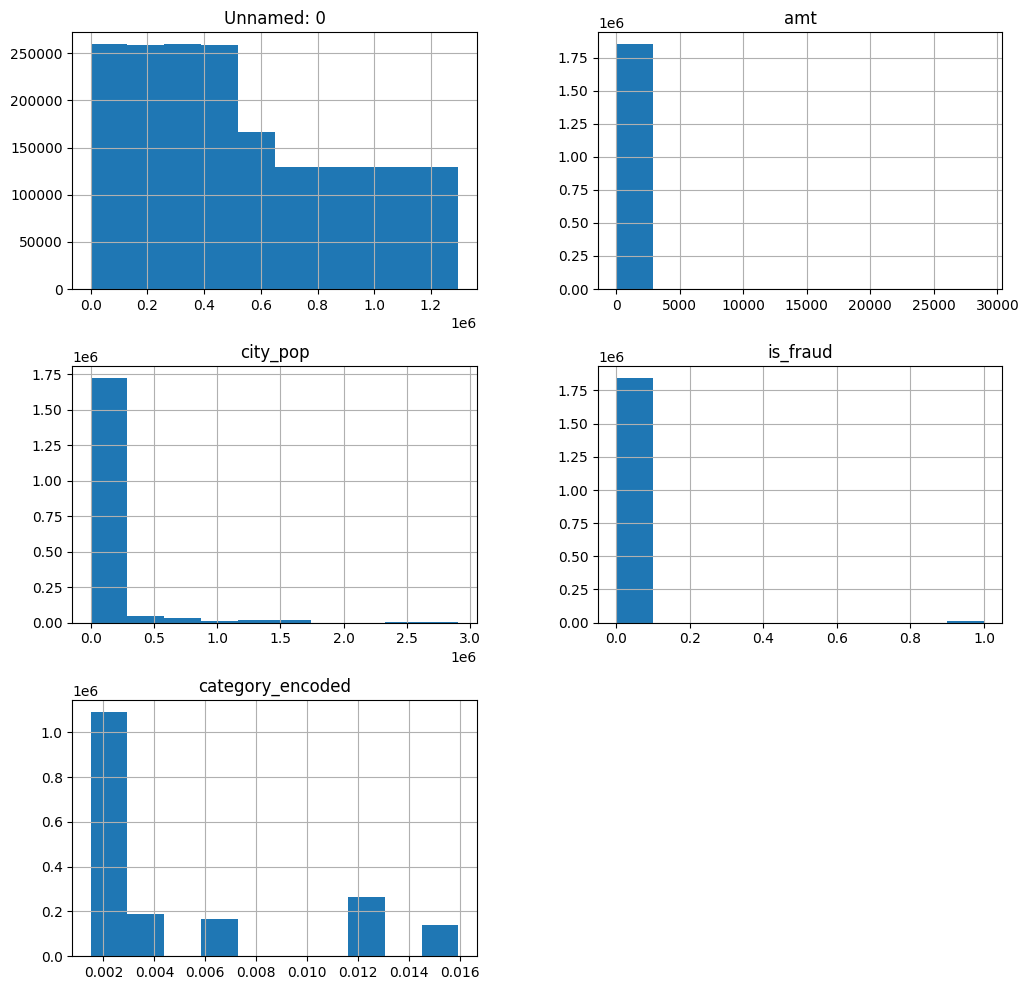

In [10]:
#hist of all columns
df.hist(figsize=(12,12))
plt.show()


#correlation matrix



#check for missing values

In [11]:
#remove missing values
df.dropna(inplace=True)
#remove duplicates
df.drop_duplicates(inplace=True)

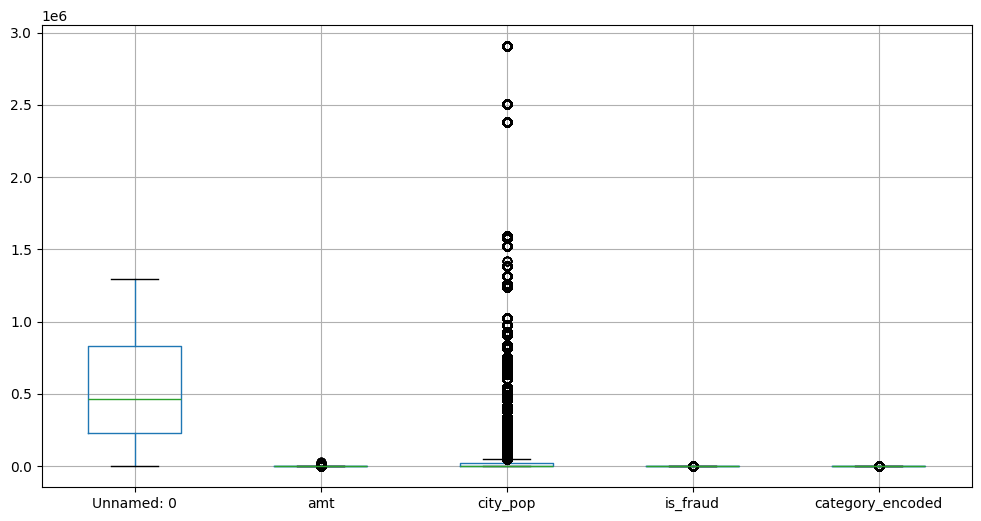

In [12]:
#see outliers
df.boxplot(figsize=(12,6))
plt.show()


In [13]:
df.columns



Index(['Unnamed: 0', 'amt', 'gender', 'city_pop', 'is_fraud',
       'category_encoded'],
      dtype='object')

In [14]:
#robust scaler 
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
df['amt']=scaler.fit_transform(df[['amt']])



In [15]:
#encode target using label encoder
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['is_fraud'] = encoder.fit_transform(df['is_fraud'])

df['is_fraud'].value_counts()


is_fraud
0    1842743
1       9651
Name: count, dtype: int64

In [17]:
#encode Gender using one hot encoding
df = pd.get_dummies(df, columns=['gender'])

df.head()

,Unnamed: 0,amt,city_pop,is_fraud,category_encoded,gender_F,gender_M
0,0,-0.606997,333497,0,0.002229,False,True
1,1,-0.239722,302,0,0.002229,True,False
2,2,-0.083991,34496,0,0.001510,True,False
3,3,0.171522,54767,0,0.002819,False,True
4,4,-0.602505,1126,0,0.002692,False,True


In [18]:
df.isnull().sum()

Unnamed: 0          0
amt                 0
city_pop            0
is_fraud            0
category_encoded    0
gender_F            0
gender_M            0
dtype: int64

In [19]:
#models training and evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

#split the data
X = df.drop('is_fraud', axis=1)
y = df['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#models
models = []
models.append(('LR', LogisticRegression()))
models.append(('RF', RandomForestClassifier()))
models.append(('SVC', SVC()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('MLP', MLPClassifier()))
models.append(('GB', GradientBoostingClassifier()))
models.append(('AB', AdaBoostClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('BC', BaggingClassifier()))
models.append(('VC', VotingClassifier(estimators=[('RF', RandomForestClassifier()), ('GB', GradientBoostingClassifier()), ('MLP', MLPClassifier())])))



In [21]:
#evaluate model using cross validation, accuracy, confusion matrix and classification report
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(name)
    print('Accuracy: ', accuracy_score(y_test, y_pred))
    print('Confusion Matrix: \n', confusion_matrix(y_test, y_pred))
    print('Classification Report: \n', classification_report(y_test, y_pred))
    print('\n\n')

    

LR
Accuracy:  0.9944126387730479
Confusion Matrix: 
 [[368409    173]
 [  1897      0]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00    368582
           1       0.00      0.00      0.00      1897

    accuracy                           0.99    370479
   macro avg       0.50      0.50      0.50    370479
weighted avg       0.99      0.99      0.99    370479




RF
Accuracy:  0.9997300791677801
Confusion Matrix: 
 [[368581      1]
 [    99   1798]]
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    368582
           1       1.00      0.95      0.97      1897

    accuracy                           1.00    370479
   macro avg       1.00      0.97      0.99    370479
weighted avg       1.00      1.00      1.00    370479




